# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Nguyen Khanh Nhan
- Student ID: 21127657

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [85]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas as gpd

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [26]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - `Country Name`: Name of the country.
    - `Total Cases`: Total number of corona virus cases since the begining in this country.
    - `New Cases`: New number of corona virus cases in this country after the last update (24h).
    - `Total Deaths`: Cumulative number of deaths among detected cases in the country.
    - `New Deaths`: The total number of corona virus infections and deaths that have occurred in the past 24 hours.
    - `Total Recovered`: The total number of confirmed recoveries from COVID-19 in this country. However, it is important to note that this figure may **not be entirely accurate**, as individuals who have been infected with the coronavirus for more than three weeks and have not died are still considered recovered, regardless of whether they may still carry the virus in their bodies.
    - `Active Cases`: The total number of current positive cases in the country. `Active Cases` = `(total cases)` - `(total deaths)` - `(recovered)`.
    - `Critical Cases`: The total number of positive cases in critical condition. Today, it represents for the most part the number of patients currently being treated in Intensive Care Unit (ICU)
    - `Total Tests`: The total number of corona virus tests conducted in this country since the pandemic began, considering that an individual may undergo multiple tests.
    - `Population`: Current total population of the country.

- Check the data with `info()` function

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [28]:
# TODO: drop New Cases, New Deaths, Critical Cases
df = df.drop(['New Cases', 'New Deaths', 'Critical Cases'], axis=1)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [29]:
# TODO: convert data to integer. if the converter returns error, leave it a None
def convert(value):
    try:
        return int(value.replace(',', ''))
    except:
        return None

num_features = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
df[num_features] = df[num_features].map(convert)
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

**Answer**: 
- Because handling missing values before simply removing columns with a majority of missing values. However, for columns with a small number of missing values such as `Total Tests`, `Active Cases`,... we still keep them.
- There is also a special case with the `Total Deaths` column. In reality, this column contains some empty strings, but when reading the file, pandas converts them to the value `0`. So initially, we may not see any missing values in this column. However, after converting data to integers, we see some missing values in this column. The simple reason is that empty strings cannot be converted to integers.

In [30]:
# TODO: fill in the missing data with median value
df[num_features] = df[num_features].fillna(df[num_features].median())

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

**Answer**:
- First, four columns: `Total Tests`, `Active Cases`, `Total Recovered`, `Total Deaths` have missing values and the function `convert()` will return `None` if we can not convert data to integer. So, this 4 columns will contain `numerical values` and `None` after converting. Then, The series declared with `None` is automatically changed to `NaN`. This is because `pandas` automatically convert `None` to `NaN` since the other values in the series are numeric, allowing the dtype to change to `float64`.
- So this is why the data type of two columns `Total Cases` and `Population` are `int64` due to these two columns do not have any missing values.
-  [References](https://www.linkedin.com/pulse/nan-nat-none-whats-difference-make-data-useful/)

In [32]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)

In [33]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [34]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


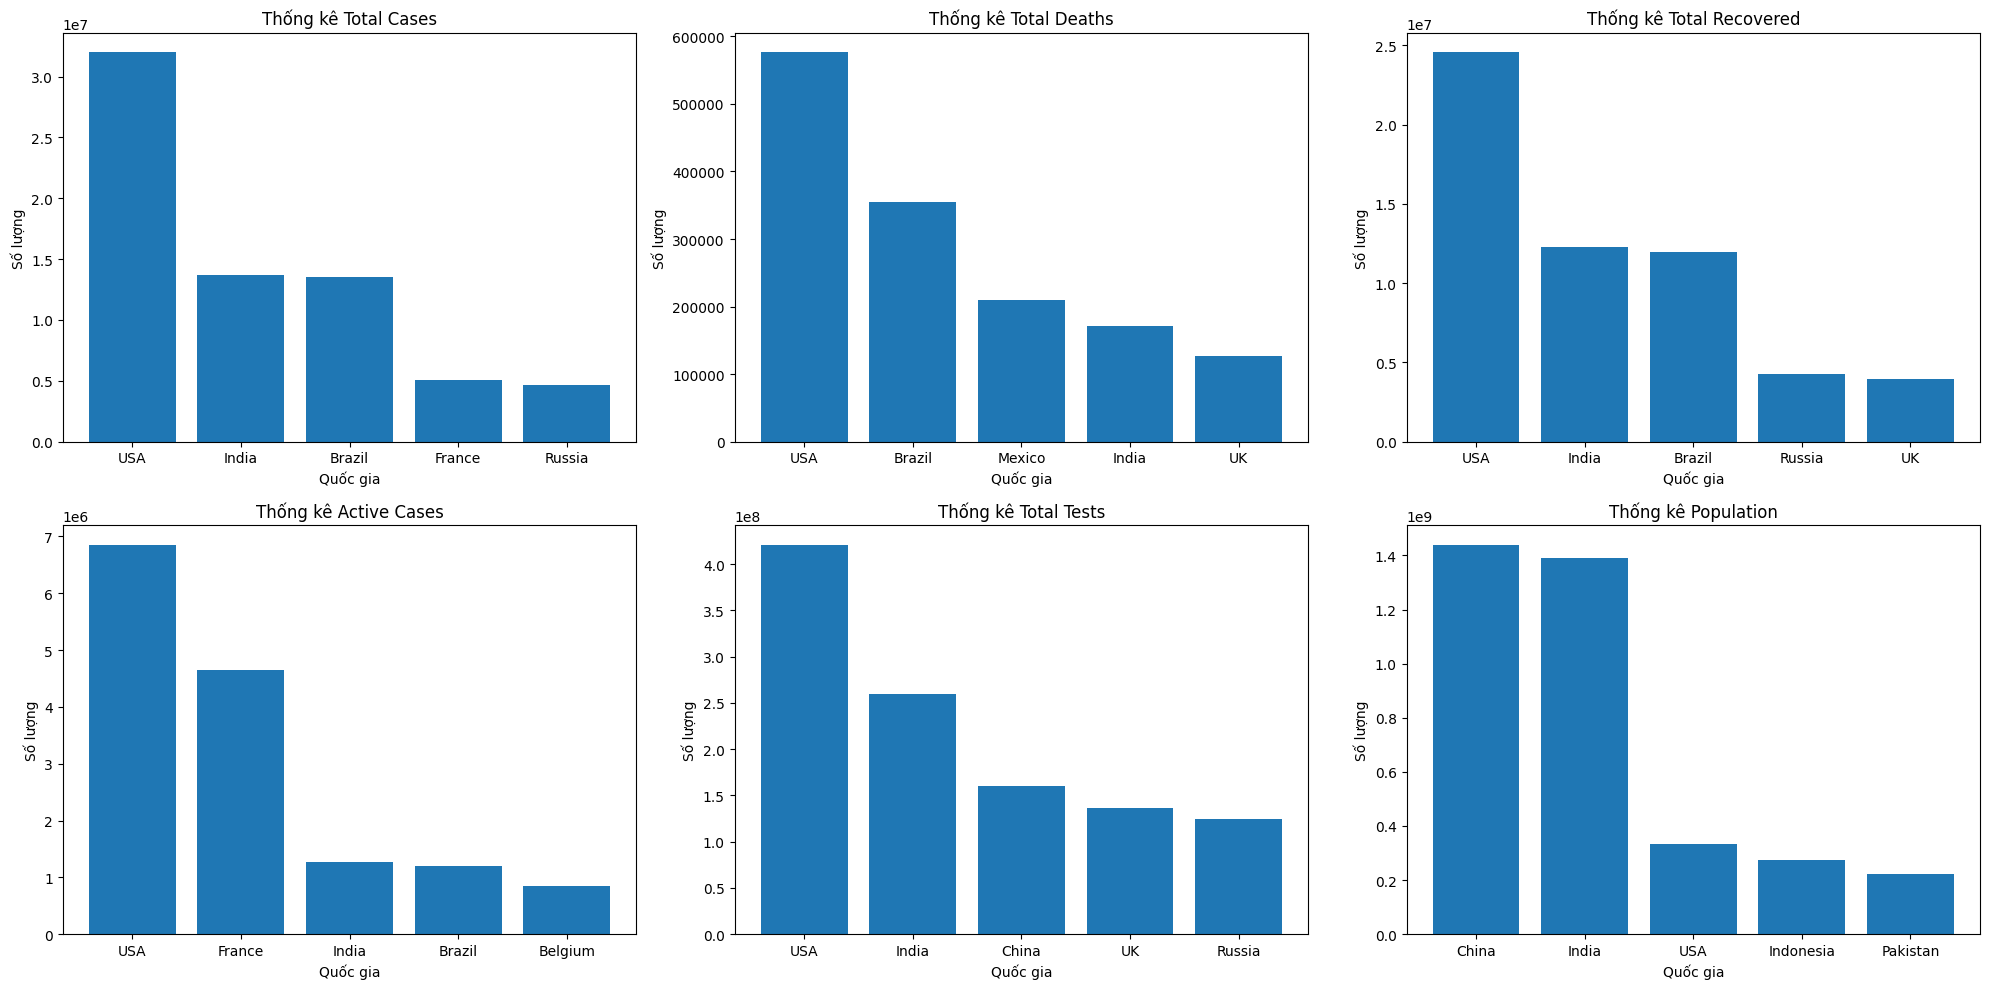

In [43]:
# TODO: draw 6 bar charts
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i in range(6):
    sub_df = df[["Country Name", num_features[i]]].sort_values(by=num_features[i], ascending=False).head()
    axes[i//3, i%3].bar(sub_df["Country Name"], sub_df[num_features[i]])
    axes[i//3, i%3].set_title(f"Thống kê {num_features[i]}")
    axes[i//3, i%3].set_xlabel("Quốc gia")
    axes[i//3, i%3].set_ylabel("Số lượng")
    
plt.tight_layout()
plt.show()

**TODO**: Comment about the chart

**Answer**:
- Except for the `population`, `USA` has the highest number of `Total Cases, Total Deaths, and Active Cases`. This partly reflects the initial lack of preparedness in COVID-19 prevention and control measures in the USA. However, since then, the USA has taken strong steps to curb the spread of the disease. This is evident in the fact that the USA also leads in terms of the `Total Recovered` and `Total Tests`.
- `Brazil` has a relatively large number of `total cases` and `total deaths`, ranking third and second, respectively, despite not having an excessively high `population`. This could be attributed to the possibility that disease prevention and control measures in `Brazil` were **not effectively implemented**.
- `India` has a very large `population`, which contributes to its high `Total Cases`. However, `Total Deaths` in    `India` is not excessively high, while `Total Recovered` is relatively high. This could indicate that disease prevention and control measures in `India` have been implemented quite effectively.
- Countries like `China, Indonesia, and Pakistan`, despite having large `populations`, but having low disease-related statistics. This reflects that disease prevention and control measures in these countries have been **implemented effectively**.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.json` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

In [146]:
data3 = df.groupby('Country Name').apply(lambda x: x[['Total Cases', 'Total Deaths']].values.tolist()).to_dict()
data3 = {key: [item for sublist in value for item in sublist] for key, value in data3.items()}


In [147]:
with open('./data/coord.json', 'r') as file:
    coord_data = json.load(file)

for country, coord in coord_data["long"].items():
    if country in data3.keys():
        data3[country].append(coord)
for country, coord in coord_data["lat"].items():
    if country in data3.keys():
        data3[country].append(coord)

In [171]:
for k, v in data3.items():
    if len(v) != 4:
        print(k)

Bahamas
Brunei 
Cabo Verde
Caribbean Netherlands
Channel Islands
Curaçao
Eswatini
Faeroe Islands
Gambia
Ivory Coast
Macao
Myanmar
Palestine
Réunion
S. Korea
Saint Pierre Miquelon
Sint Maarten
St. Barth
Timor-Leste
Turks and Caicos
Vatican City


In [172]:
data3["Bahamas"].extend([-76, 24.15])
data3["Brunei "].extend([114.4, 4.3])
data3["Cabo Verde"].extend([-24, 16])
data3["Caribbean Netherlands"].extend([-68.25, 12.2])
data3

[19110.0, 184.0]

C:\Users\User\AppData\Local\Temp\ipykernel_17172\3090867481.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


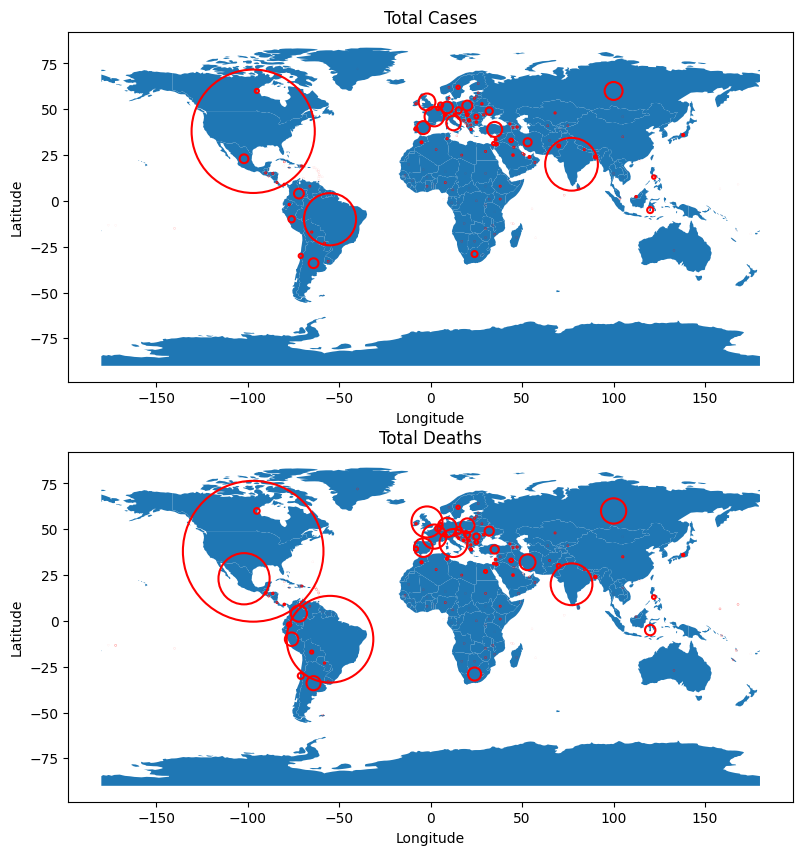

In [169]:
# TODO: draw 2 world map chart using geopandas

title = ['Total Cases', 'Total Deaths']
rate = [950000, 15000]


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))




fig, ax = plt.subplots(2,1,figsize=(30, 10))

for i in range(2):
    world.plot(ax=ax[i], figsize=(30, 10))

    # Plot the circles
    for values in data3.values():
        if len(values) == 4:
            ax[i].add_patch(plt.Circle((values[2], values[3]), radius=values[i] / rate[i], fc='None', ec='red', alpha=1, lw=1.5))
            
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel('Latitude')

# Display the map
plt.show()

**TODO**: Comment about the chart

...

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

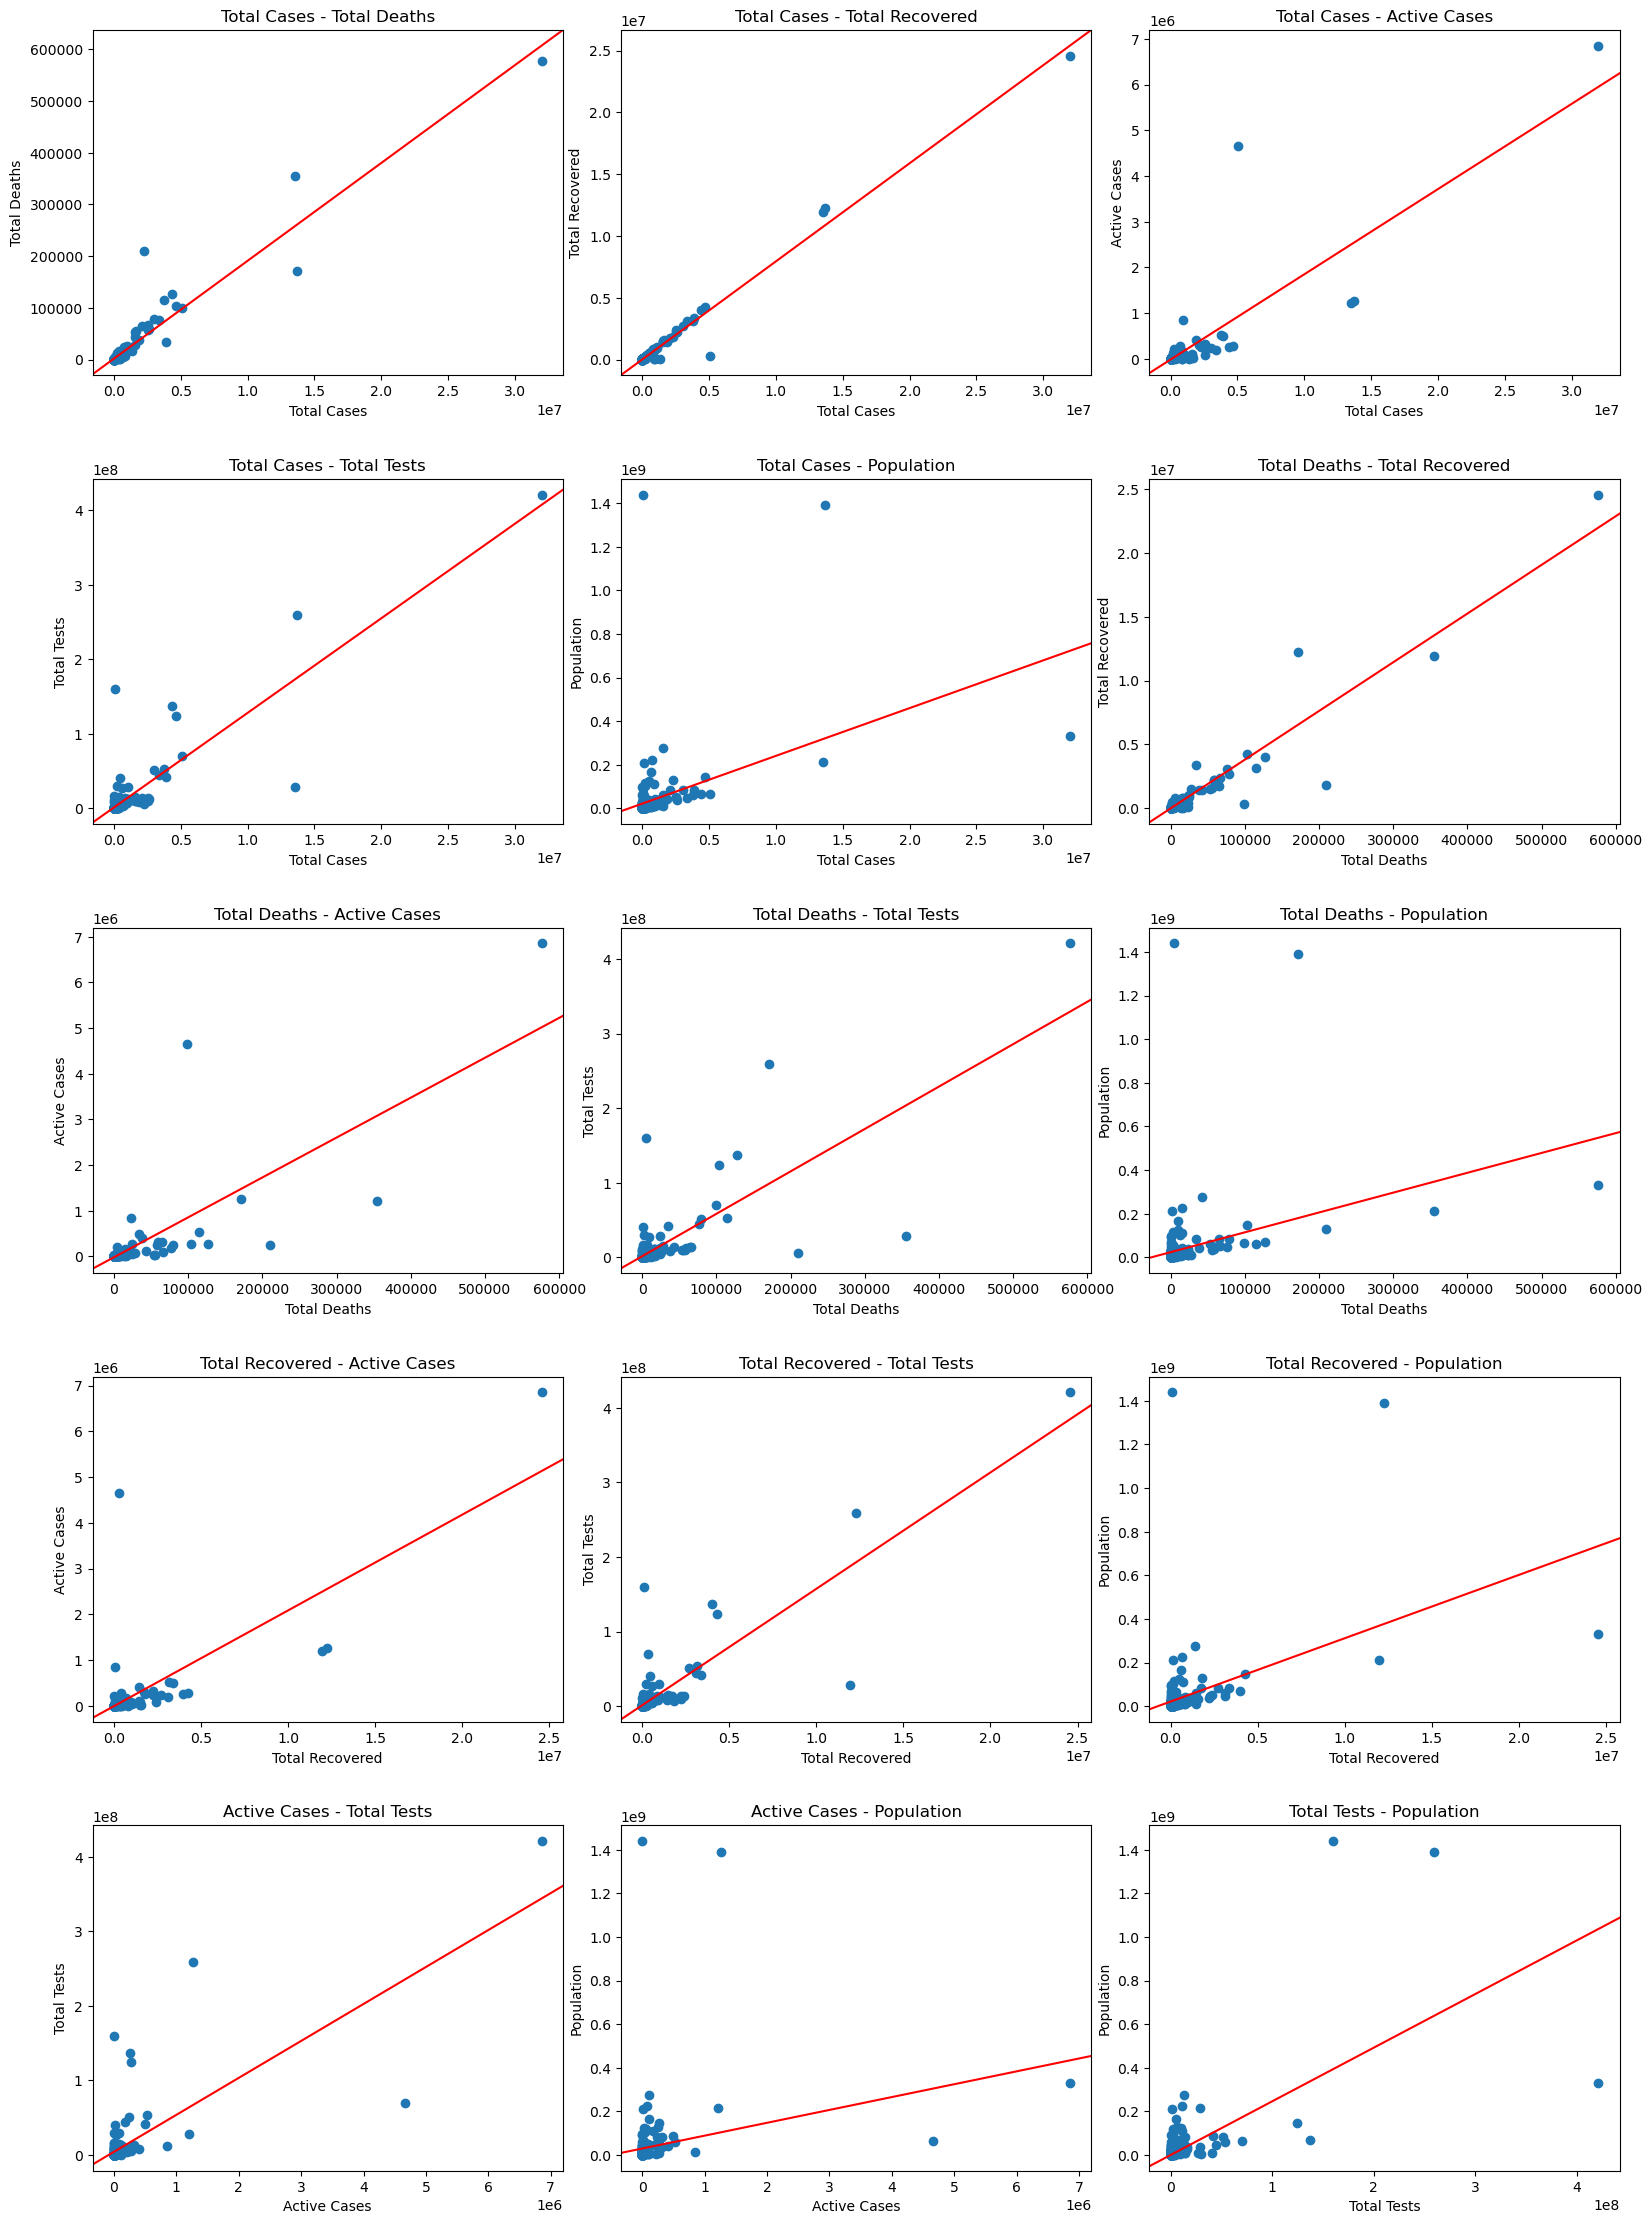

In [ ]:
# TODO: scatter stuff
raise NotImplementedError('not implemented')

**TODO**: As showed above, give your prediction about the relationship between each pair.

...

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

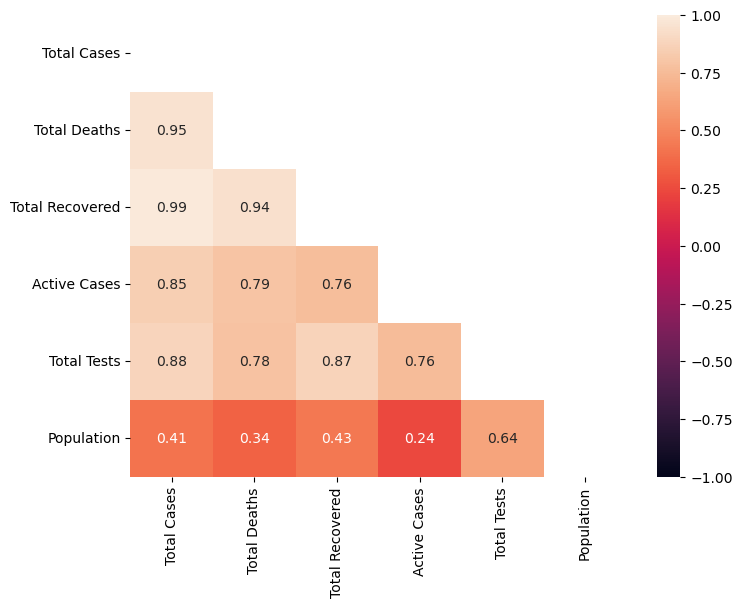

In [ ]:
# TODO: create heatamp
raise NotImplementedError('not implemented')

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

...

In [ ]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32
raise NotImplementedError('not implemented')

- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

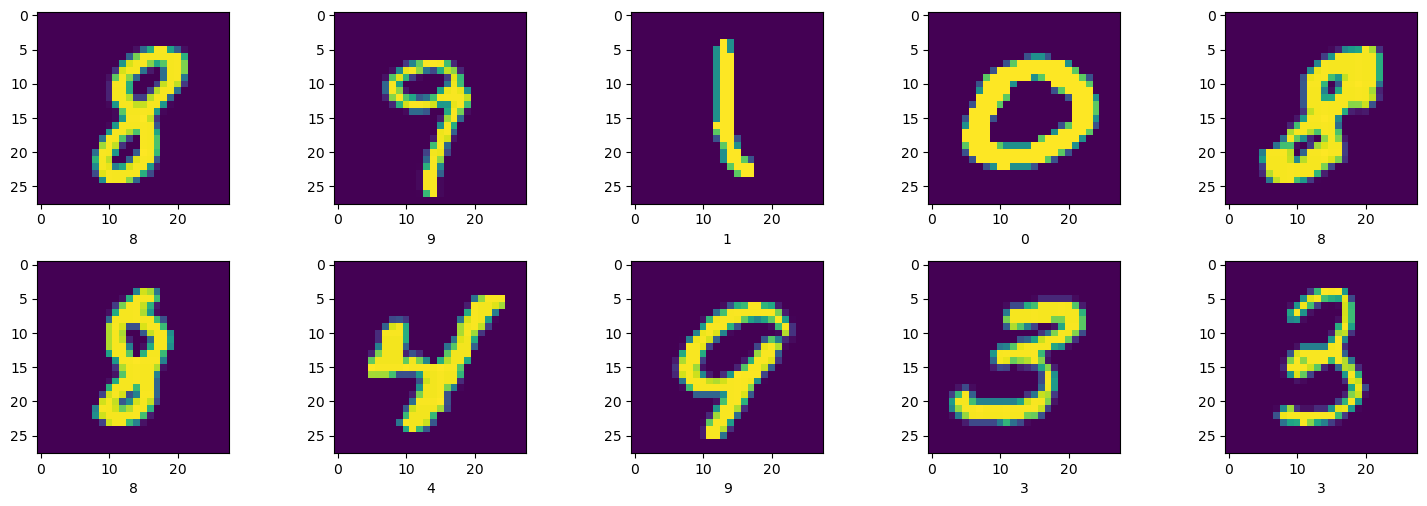

In [ ]:
# TODO: visualize 10 random samples
raise NotImplementedError('not implemented')

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [ ]:
# TODO: create Mnist_FC and Mnist_CNN
raise NotImplementedError('not implemented')

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

...

In [ ]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    raise NotImplementedError('not implemented')

def test(dataloader, model):
    raise NotImplementedError('not implemented')

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

...

In [ ]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
raise NotImplementedError('not implemented')

========== FC model ==========

Epoch 1
-------------------------------


/Users/nguyenbaolong/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Training acc: 0.384
Testing acc: 0.614

Epoch 2
-------------------------------
Training acc: 0.682
Testing acc: 0.741

Epoch 3
-------------------------------
Training acc: 0.758
Testing acc: 0.795

Epoch 4
-------------------------------
Training acc: 0.806
Testing acc: 0.830

Epoch 5
-------------------------------
Training acc: 0.835
Testing acc: 0.853

Epoch 6
-------------------------------
Training acc: 0.855
Testing acc: 0.868

Epoch 7
-------------------------------
Training acc: 0.868
Testing acc: 0.880

Epoch 8
-------------------------------
Training acc: 0.878
Testing acc: 0.888

Epoch 9
-------------------------------
Training acc: 0.884
Testing acc: 0.892

Epoch 10
-------------------------------
Training acc: 0.889
Testing acc: 0.897

Epoch 11
-------------------------------
Training acc: 0.893
Testing acc: 0.899

Epoch 12
-------------------------------
Training acc: 0.897
Testing acc: 0.901

Epoch 13
-------------------------------
Training acc: 0.899
Testing acc: 0.9

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

...

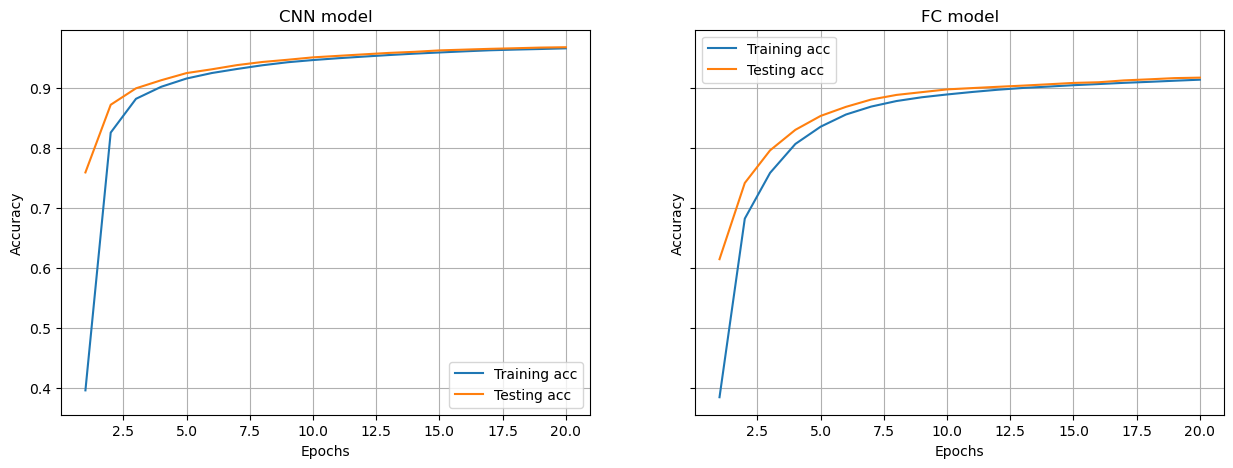

In [ ]:
# TODO: visualize the history
raise NotImplementedError('not implemented')

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab